## Creating Survey Data
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_rand(length):
    '''
    Create a list of random integers from between 1 and 5 (inclusive) of input length.
    Not truly random as this attemps to add noise while pushing the distribtion closer
    to normal distribution.
    
    INPUT - desired length of array
    OUTPUT - array of integers (1 to 5)
    '''
    # Generate random list of integers
    s = np.random.randint(low = 1, high = 6, size = length)
    
    # Alter with the distribution 'randomly'
    counter_5 = 0
    counter_1 = 0
    for i, ss in enumerate(s):
        if ss == 1:
            counter_1 += 1
            if counter_1 % 2 == 0:
                s[i] = s[i]+1
        elif ss == 5:
            counter_5 += 1
            if counter_5 % 2 == 0:
                s[i] = s[i]-1
        elif ss == 2:
            if counter_5 % 2 == 0:
                s[i] = s[i]+1
        elif ss == 4:
            if counter_5 % 2 == 0:
                s[i] = s[i]-1
        else:
            #if (counter_1 % 2 == 0) or (counter_5 % 2 == 0):
            s[i] = np.random.randint(low = 1, high = 6, size = 1)[0]
    return s

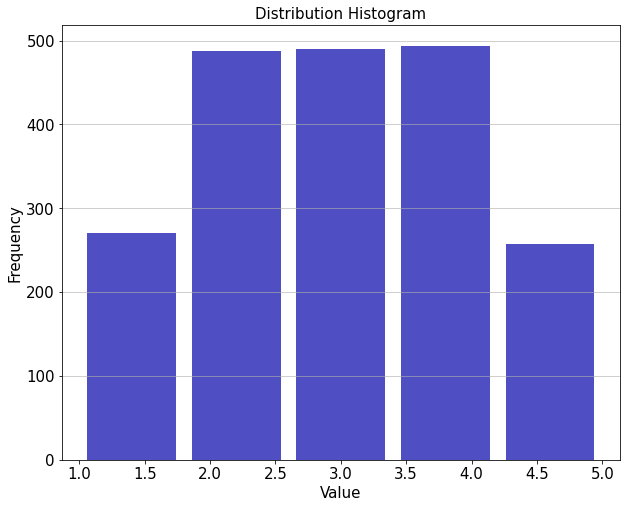

In [3]:
# Check distribution of custom random function - rerun many times to test outputs
s = make_rand(2000)

hist, bin_edges = np.histogram(s,bins=range(5))

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=s, bins=5, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution Histogram',fontsize=15)
plt.show()

---

Columns
- Employee ID
- Team
- Date
- Work Days
- Home Days
- Office Environment
- Home Environment
- Colleague Relationships
- Role
- Work-life
- Connectedness
- Team Involvement
- Loneliness
- Productivity

In [4]:
# Create empty DataFrame for later
cols = ['employee_id','team','date','work_days','home_days','office_env','home_env','relationships','role', 'worklife', 'connections','involvement','lonliness','productivity']
df = pd.DataFrame(data=None, columns = cols)
df

,employee_id,team,date,work_days,home_days,office_env,home_env,relationships,role,worklife,connections,involvement,lonliness,productivity


In [5]:
teams = ['Production', 'Sales', 'Marketing', 'RD', 'HR', 'Accounting']

In [6]:
from datetime import timedelta

# Create list of dates - Every Friday starting Jan 3, 2020
dates = []

# First date (adding 7 days each iteration)
my_date = pd.datetime(year=2020,month=1,day=3)

for i in range(0,52):
    dates.append(my_date)
    my_date = my_date + timedelta(days=7)

dates

[datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 17, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 21, 0, 0),
 datetime.datetime(2020, 2, 28, 0, 0),
 datetime.datetime(2020, 3, 6, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 27, 0, 0),
 datetime.datetime(2020, 4, 3, 0, 0),
 datetime.datetime(2020, 4, 10, 0, 0),
 datetime.datetime(2020, 4, 17, 0, 0),
 datetime.datetime(2020, 4, 24, 0, 0),
 datetime.datetime(2020, 5, 1, 0, 0),
 datetime.datetime(2020, 5, 8, 0, 0),
 datetime.datetime(2020, 5, 15, 0, 0),
 datetime.datetime(2020, 5, 22, 0, 0),
 datetime.datetime(2020, 5, 29, 0, 0),
 datetime.datetime(2020, 6, 5, 0, 0),
 datetime.datetime(2020, 6, 12, 0, 0),
 datetime.datetime(2020, 6, 19, 0, 0),
 datetime.datetime(2020, 6, 26, 

In [7]:
# Simulate a year of data (52 weeks) for 20 employees on each of the 6 teams (120 employees)

# Dictionary structure we will use
row = {'employee_id':'', 'team':'', 'date':'', 'work_days':'', 'home_days':'',
       'office_env':'', 'home_env':'', 'relationships':'', 'role':'', 'worklife':'',
       'connections':'','involvement':'', 'lonliness':'', 'productivity':''
      }

num_team_members = 20
num_rows = len(teams) * num_team_members * len(dates)

In [8]:
work_days = make_rand(num_rows)
#home_days = make_rand(num_rows)
office_env = make_rand(num_rows)
home_env = make_rand(num_rows)
relationships = make_rand(num_rows)
role = make_rand(num_rows)
connections = make_rand(num_rows)
involvement = make_rand(num_rows)
lonliness = make_rand(num_rows)
productivity = make_rand(num_rows)

In [9]:
type(productivity)

numpy.ndarray

In [10]:
list_of_dfs = []

counter = 0
# Teams
for tid, t in enumerate(teams):
    # Employees (arbitrary 20 per team)
    for i in range(1, num_team_members+1):
        # Dates
        for date in dates:
            row = {}
            
            row['employee_id'] = int( str(tid+1) + str(i) )
            row['team'] = t
            row['date'] = date
            row['work_days'] = work_days[counter]
            row['home_days'] = 5 - row['work_days']
            
            row['office_env'] = office_env[counter]
            row['home_env'] = home_env[counter]
            row['relationships'] = relationships[counter]
            row['role'] = role[counter]
            
            row['connections'] = connections[counter]
            row['involvement'] = involvement[counter]
            row['lonliness'] = lonliness[counter]
            row['productivity'] = productivity[counter]
            
            temp_df = pd.DataFrame.from_dict(row, orient='index')
            list_of_dfs.append(temp_df.T)
            counter += 1
            
            
result = pd.concat(list_of_dfs, ignore_index=True)

In [11]:
result

,employee_id,team,date,work_days,home_days,office_env,home_env,relationships,role,connections,involvement,lonliness,productivity
0,11,Production,2020-01-03,1,4,3,5,5,3,3,1,5,3
1,11,Production,2020-01-10,5,0,3,1,4,3,4,3,4,3
2,11,Production,2020-01-17,2,3,1,2,2,1,1,3,4,1
3,11,Production,2020-01-24,2,3,4,1,4,2,3,5,2,3
4,11,Production,2020-01-31,4,1,2,2,2,5,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,620,Accounting,2020-11-27,2,3,2,2,1,1,5,4,2,2
6236,620,Accounting,2020-12-04,5,0,4,5,3,5,4,5,4,2
6237,620,Accounting,2020-12-11,4,1,4,2,5,2,2,4,1,5
6238,620,Accounting,2020-12-18,3,2,4,2,4,2,4,2,5,4


In [14]:
result.to_csv('survey_data.csv', index=False)

---

#### TESTING

Ignore everything below - it's not normally distributed.
```python
list_of_dfs = []

counter = 0
# Teams
for tid, t in enumerate(teams):
    # Employees (arbitrary 20 per team)
    for i in range(1, num_team_members+1):
        # Dates
        for date in dates:
            row = {}
            
            row['employee_id'] = int( str(tid+1) + str(i) )
            row['team'] = t
            row['date'] = date
            row['work_days'] = np.random.randint(1,6)
            row['home_days'] = 5 - row['work_days']
            
            row['office_env'] = np.random.randint(1,6)
            row['home_env'] = np.random.randint(1,6)
            row['relationships'] = np.random.randint(1,6)
            row['role'] = np.random.randint(1,6)
            
            row['connections'] = np.random.randint(1,6)
            row['involvement'] = np.random.randint(1,6)
            row['lonliness'] = np.random.randint(1,6)
            row['productivity'] = np.random.randint(1,6)
            
            temp_df = pd.DataFrame.from_dict(row, orient='index')
            list_of_dfs.append(temp_df.T)
            count += 1
            
            
result = pd.concat(list_of_dfs, ignore_index=True)
```

In [12]:
num_rows

6240